# Лабараторная работа по python № 1

# Автор: Ежов Дмитрий Александрович

Группа: J3111, ИСУ: 471242


In [19]:
# Download dataset: Seoul Bike Sharing Demand
# https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand
%pip install ucimlrepo

# import
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from ucimlrepo import fetch_ucirepo

Note: you may need to restart the kernel to use updated packages.


# I. Подготовка данных и базовые операции с NumPy

## 1. Загрузка и подготовка данных:


In [3]:
# Import data, show metadata

# https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand

seoul_bike_sharing_demand = fetch_ucirepo(id=560)
# print(seoul_bike_sharing_demand)

# metadata
print(seoul_bike_sharing_demand.metadata)

# variable information
print(seoul_bike_sharing_demand.variables)


{'uci_id': 560, 'name': 'Seoul Bike Sharing Demand', 'repository_url': 'https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand', 'data_url': 'https://archive.ics.uci.edu/static/public/560/data.csv', 'abstract': 'The dataset contains count of public bicycles rented per hour in the Seoul Bike Sharing System, with corresponding weather data and holiday information', 'area': 'Business', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 8760, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Functioning Day'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Mon Feb 05 2024', 'dataset_doi': '10.24432/C5F62R', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and a

In [4]:
# data (as pandas dataframes)
X = seoul_bike_sharing_demand.data.features
y = seoul_bike_sharing_demand.data.targets

print(X)
print(y)


# Nulls. Zero nulls
print(X.isnull().sum())
print(y.isnull().sum())

# Categorical
print(X["Seasons"].astype("category"))
X["Holiday"] = X["Holiday"].map({"No Holiday": 0, "Holiday": 1})
y["Functioning Day"] = y["Functioning Day"].map({"No": 0, "Yes": 1})
X["Seasons"] = X["Seasons"].map({"Winter": 0, "Spring": 1, "Summer": 2, "Autumn": 3})


            Date  Rented Bike Count  Hour  Temperature  Humidity  Wind speed  \
0      1/12/2017                254     0         -5.2        37         2.2   
1      1/12/2017                204     1         -5.5        38         0.8   
2      1/12/2017                173     2         -6.0        39         1.0   
3      1/12/2017                107     3         -6.2        40         0.9   
4      1/12/2017                 78     4         -6.0        36         2.3   
...          ...                ...   ...          ...       ...         ...   
8755  30/11/2018               1003    19          4.2        34         2.6   
8756  30/11/2018                764    20          3.4        37         2.3   
8757  30/11/2018                694    21          2.6        39         0.3   
8758  30/11/2018                712    22          2.1        41         1.0   
8759  30/11/2018                584    23          1.9        43         1.3   

      Visibility  Dew point temperature

/tmp/ipykernel_2344/4189243717.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Holiday"] = X["Holiday"].map({"No Holiday": 0, "Holiday": 1})
/tmp/ipykernel_2344/4189243717.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["Functioning Day"] = y["Functioning Day"].map({"No": 0, "Yes": 1})
/tmp/ipykernel_2344/4189243717.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

## 2. Основные операции с NumPy:


In [5]:
# Create a vector of each feature
feature_columns = {col: np.asarray(X[col]) for col in X.columns}
print(feature_columns["Rented Bike Count"])  # for example
# Create a matrix of features
weather_matrix = X[
    [
        "Temperature",
        "Wind speed",
        "Humidity",
        "Visibility",
        "Dew point temperature",
        "Solar Radiation",
        "Rainfall",
        "Snowfall",
        "Seasons",
    ]
].values
features = np.concatenate((X.values, y.values), axis=1)
print(features)
print(weather_matrix)

[254 204 173 ... 694 712 584]
[['1/12/2017' 254 0 ... 0 0 1]
 ['1/12/2017' 204 1 ... 0 0 1]
 ['1/12/2017' 173 2 ... 0 0 1]
 ...
 ['30/11/2018' 694 21 ... 3 0 1]
 ['30/11/2018' 712 22 ... 3 0 1]
 ['30/11/2018' 584 23 ... 3 0 1]]
[[-5.2  2.2 37.  ...  0.   0.   0. ]
 [-5.5  0.8 38.  ...  0.   0.   0. ]
 [-6.   1.  39.  ...  0.   0.   0. ]
 ...
 [ 2.6  0.3 39.  ...  0.   0.   3. ]
 [ 2.1  1.  41.  ...  0.   0.   3. ]
 [ 1.9  1.3 43.  ...  0.   0.   3. ]]


## 3. Индексация и срезы:


In [6]:
# Get subvector where rented bike count = 0
mask = feature_columns["Rented Bike Count"] == 0
print(feature_columns["Date"][mask][:10])
# Get submatrix with temperature, Wind speed
print(weather_matrix)
print(weather_matrix[:, 0:2])

import re

md = np.vectorize(
    lambda x: bool(re.match(r"\b\d{2}/12/\d{4}\b", x))
)  
maskd = md(feature_columns["Date"])
print(feature_columns["Rented Bike Count"][maskd].mean())
mj = np.vectorize(
    lambda x: bool(re.match(r"\b\d{2}/06/\d{4}\b", x))
)  
maskj = mj(feature_columns["Date"])
print(feature_columns["Rented Bike Count"][maskj].mean())

['11/4/2018' '11/4/2018' '11/4/2018' '11/4/2018' '11/4/2018' '11/4/2018'
 '11/4/2018' '11/4/2018' '11/4/2018' '11/4/2018']
[[-5.2  2.2 37.  ...  0.   0.   0. ]
 [-5.5  0.8 38.  ...  0.   0.   0. ]
 [-6.   1.  39.  ...  0.   0.   0. ]
 ...
 [ 2.6  0.3 39.  ...  0.   0.   3. ]
 [ 2.1  1.  41.  ...  0.   0.   3. ]
 [ 1.9  1.3 43.  ...  0.   0.   3. ]]
[[-5.2  2.2]
 [-5.5  0.8]
 [-6.   1. ]
 ...
 [ 2.6  0.3]
 [ 2.1  1. ]
 [ 1.9  1.3]]
213.1193181818182
1216.648148148148


# I. Операции с векторами и матрицами

## 1. Операции над векторами


In [7]:
# simple operations
print((feature_columns["Rainfall"] * 10 + feature_columns["Snowfall"]).max())
# broadcasting
print(feature_columns["Temperature"] * feature_columns["Humidity"][:, np.newaxis])

350.0
[[-192.4 -203.5 -222.  ...   96.2   77.7   70.3]
 [-197.6 -209.  -228.  ...   98.8   79.8   72.2]
 [-202.8 -214.5 -234.  ...  101.4   81.9   74.1]
 ...
 [-202.8 -214.5 -234.  ...  101.4   81.9   74.1]
 [-213.2 -225.5 -246.  ...  106.6   86.1   77.9]
 [-223.6 -236.5 -258.  ...  111.8   90.3   81.7]]


## 2. Скалярное произведение:


In [8]:
# dot product of vectors
print(feature_columns["Rainfall"].T.dot(feature_columns["Rented Bike Count"]))
print(feature_columns["Temperature"].T.dot(feature_columns["Rented Bike Count"]))
# Temperature has a stronger effect than rain

133299.9
115860790.8


# III. Анализ сходства между векторами

## 1. Корреляция и косинусное сходство:


In [9]:
# Pearson correlation
def pearson_correlation(x: np.array, y: np.array) -> float:
    if len(x) != len(y):
        raise ValueError("Vectors must be the same length")
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    covariance = np.sum((x - mean_x) * (y - mean_y))
    std_x = np.sqrt(np.sum((x - mean_x) ** 2))
    std_y = np.sqrt(np.sum((y - mean_y) ** 2))

    if std_x == 0 or std_y == 0:
        return 0
    return covariance / (std_x * std_y)


# Verify
from scipy.stats import pearsonr

print(
    f"My pearson correlation between Temperature and Solar Radiation: {pearson_correlation(feature_columns['Temperature'], feature_columns['Solar Radiation'])}\n"
    f"Scipy pearosn correlation: {pearsonr(feature_columns['Temperature'], feature_columns['Solar Radiation'])[0]}",
)

My pearson correlation between Temperature and Solar Radiation: 0.353505470147949
Scipy pearosn correlation: 0.3535054701479491


In [10]:
# Cosine correlation
def cosine_similarity(x: np.array, y: np.array) -> float:
    if len(x) != len(y):
        raise ValueError("Vectors must be the same length")

    dot_product = np.dot(x, y)

    norm_x = np.linalg.norm(x)
    norm_y = np.linalg.norm(y)

    if norm_x == 0 or norm_y == 0:
        return 0
    return dot_product / (norm_x * norm_y)


# Verify
from sklearn.metrics.pairwise import cosine_similarity as sklearn_cosine_similarity

print(
    f"My cosine similary between Temperature and Solar Radiation: {cosine_similarity(feature_columns['Wind speed'], feature_columns['Rainfall'])}\n"
    f"Scipy cosine similary: {sklearn_cosine_similarity([feature_columns['Wind speed']], [feature_columns['Rainfall']])[0][0]}",
)

My cosine similary between Temperature and Solar Radiation: 0.10196663412659339
Scipy cosine similary: 0.10196663412659379


## 2. Нормализация векторов


In [11]:
def normalize(v: np.array) -> np.array:
    norm = np.linalg.norm(v)
    if norm == 0:
        return v
    return v / norm


print(feature_columns["Hour"])
print(normalize(feature_columns["Hour"]))

[ 0  1  2 ... 21 22 23]
[0.         0.000796   0.00159199 ... 0.01671591 0.01751191 0.0183079 ]


## 3. Поиск сходства


In [12]:
def euclidean_distance(vec1: np.array, vec2: np.array) -> float:
    return np.sqrt(np.sum((vec1 - vec2) ** 2))


def find_most_similar_days(
    query_vector: np.array, data_vectors: np.array, k=3
) -> list[np.array]:
    distances = []

    for i, data_vector in enumerate(data_vectors):
        distance = euclidean_distance(query_vector, data_vector)
        distances.append((distance, i))  

    sorted_distances = sorted(distances, key=lambda x: x[0])

    return [index for _, index in sorted_distances[:k]]


most_sim_days = find_most_similar_days(features[0][1:], features[:, 1:])

for i in most_sim_days:
    print(f"Day index: {i}")
    print(features[i])

Day index: 0
['1/12/2017' 254 0 -5.2 37 2.2 2000 -17.6 0.0 0.0 0.0 0 0 1]
Day index: 655
['28/12/2017' 257 7 -5.0 31 0.5 2000 -19.5 0.0 0.0 0.0 0 0 1]
Day index: 631
['27/12/2017' 262 7 -10.1 38 2.3 2000 -21.7 0.0 0.0 0.0 0 0 1]


# IV. Прогнозирование и кластеризация

## 1. Фильтрация временных рядов:


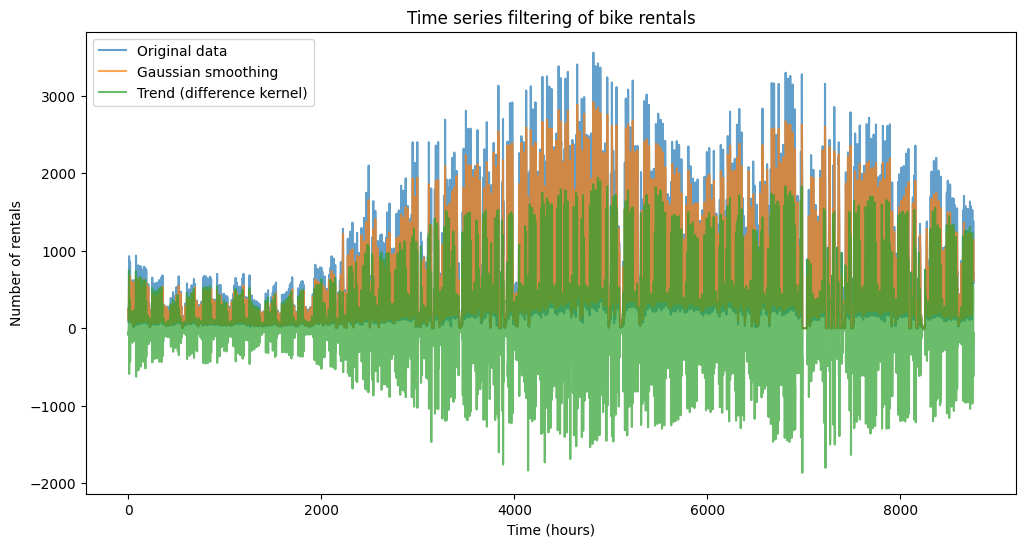

In [ ]:
def apply_filter(time_series: np.array, kernel: np.array) -> np.array:
    n = len(time_series)
    k = len(kernel)
    padded = np.pad(time_series, (k // 2, k // 2), mode="edge")
    smoothed = np.array([np.dot(padded[i : i + k], kernel) for i in range(n)])
    return smoothed


# Example kernels
# Rectangular kernel (moving average)
kernel_mean = np.array([0.2, 0.2, 0.2, 0.2, 0.2])  # Window of 5
# Gaussian kernel (smoothing)
kernel_gaussian = np.array([0.05, 0.25, 0.4, 0.25, 0.05])
# Trend detection kernel (difference)
kernel_trend = np.array([-1, 0, 1])

# Applying filters to bike rental data
bike_counts = feature_columns["Rented Bike Count"]
smoothed_mean = apply_filter(bike_counts, kernel_mean)
smoothed_gaussian = apply_filter(bike_counts, kernel_gaussian)
trend = apply_filter(bike_counts, kernel_trend)


plt.figure(figsize=(12, 6))
plt.plot(bike_counts, alpha=0.7, label="Original data")
plt.plot(smoothed_mean, alpha=0.7, label="Moving average")
plt.plot(smoothed_gaussian, alpha=0.7, label="Gaussian smoothing")
plt.plot(trend, alpha=0.7, label="Trend (difference kernel)")
plt.legend()
plt.title("Time series filtering of bike rentals")
plt.xlabel("Time (hours)")
plt.ylabel("Number of rentals")
plt.show()

## Класстеризация


In [ ]:
def perform_kmeans_clustering(input_data, num_clusters=3, max_iterations=100):
    input_data = np.asarray(input_data, dtype=np.float64)
    
    random_indices = np.random.choice(input_data.shape[0], num_clusters, replace=False)
    cluster_centers = input_data[random_indices]
    
    for _ in range(max_iterations):
        point_distances = np.linalg.norm(input_data[:, None] - cluster_centers, axis=2)
        
        cluster_labels = np.argmin(point_distances, axis=1)
        
        updated_centers = []
        for cluster_id in range(num_clusters):
            cluster_points = input_data[cluster_labels == cluster_id]
            if len(cluster_points) > 0:
                updated_centers.append(cluster_points.mean(axis=0))
            else:
                updated_centers.append(cluster_centers[cluster_id])
        
        updated_centers = np.vstack(updated_centers)
        
        if np.allclose(cluster_centers, updated_centers):
            break
            
        cluster_centers = updated_centers
    
    return cluster_labels, cluster_centers

weather_cluster_labels, weather_cluster_centers = perform_kmeans_clustering(
    weather_matrix, 
    num_clusters=3
)

print("Пример меток кластеров для первых 5 точек:", weather_cluster_labels[:5])
print("Координаты центров кластеров:\n", weather_cluster_centers)

Пример меток кластеров для первых 5 точек: [2 2 2 2 2]
Координаты центров кластеров:
 [[1.39236777e+01 1.61992091e+00 6.04305487e+01 1.22054918e+03
  5.82407316e+00 5.93153732e-01 9.24864063e-02 6.69303015e-02
  1.49975284e+00]
 [1.16559554e+01 1.45813482e+00 7.61561075e+01 4.84985808e+02
  7.21439432e+00 3.16208819e-01 4.89406994e-01 1.57323872e-01
  1.31018753e+00]
 [1.29491184e+01 1.87997481e+00 4.98646096e+01 1.92286860e+03
  2.02991184e+00 6.63639798e-01 3.14441646e-02 4.44584383e-02
  1.58627204e+00]]


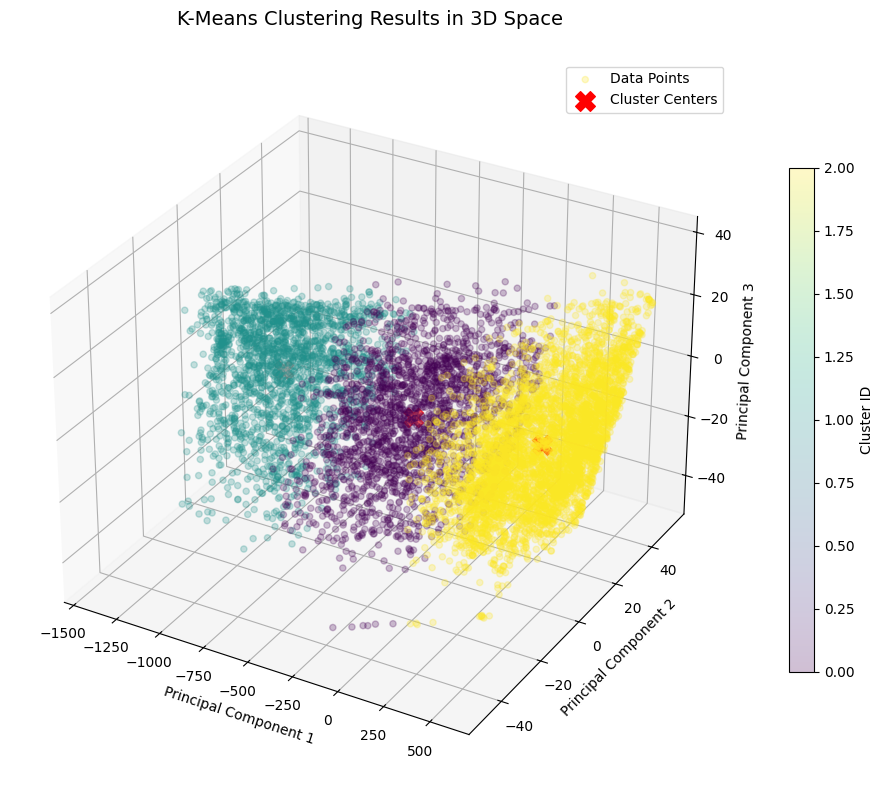

In [26]:

dimensionality_reducer = PCA(n_components=3)
reduced_data = dimensionality_reducer.fit_transform(weather_matrix)
reduced_centroids = dimensionality_reducer.transform(weather_cluster_centers)

plot_figure = plt.figure(figsize=(12, 8), dpi=100)
three_d_axis = plot_figure.add_subplot(111, projection='3d')

data_points = three_d_axis.scatter(
    reduced_data[:, 0],  
    reduced_data[:, 1],  
    reduced_data[:, 2],  
    c=weather_cluster_labels,           
    alpha=0.25,         
    cmap='viridis',     
    label='Data Points'
)

centroid_points = three_d_axis.scatter(
    reduced_centroids[:, 0],
    reduced_centroids[:, 1],
    reduced_centroids[:, 2],
    c='red',            
    s=200,              
    marker='X',         
    label='Cluster Centers'
)

three_d_axis.set_title(
    'K-Means Clustering Results in 3D Space', 
    fontsize=14,
    pad=25
)
three_d_axis.set_xlabel('Principal Component 1')
three_d_axis.set_ylabel('Principal Component 2')
three_d_axis.set_zlabel('Principal Component 3')

plt.legend(loc='upper right')
plot_figure.colorbar(
    data_points, 
    ax=three_d_axis,
    shrink=0.7,
    label='Cluster ID'
)

plt.tight_layout()
plt.show()